In [7]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [8]:
X.shape, y.shape

((25000, 10, 3), (25000,))

In [9]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)

,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


In [10]:
y[0]

6.499

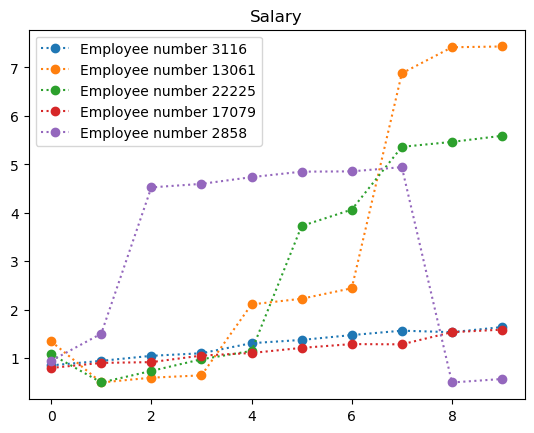

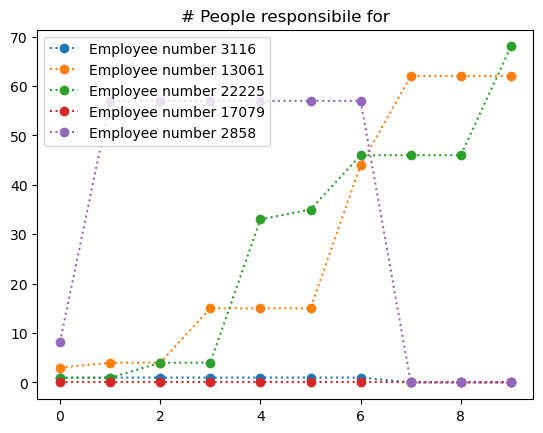

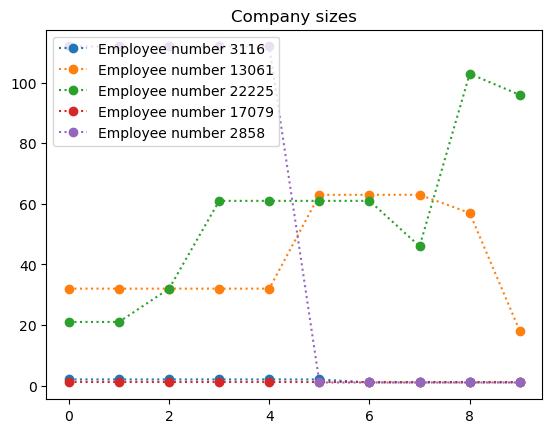

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)

number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0,
                                     number_of_employees,
                                     number_of_randomly_selected_employees)



plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

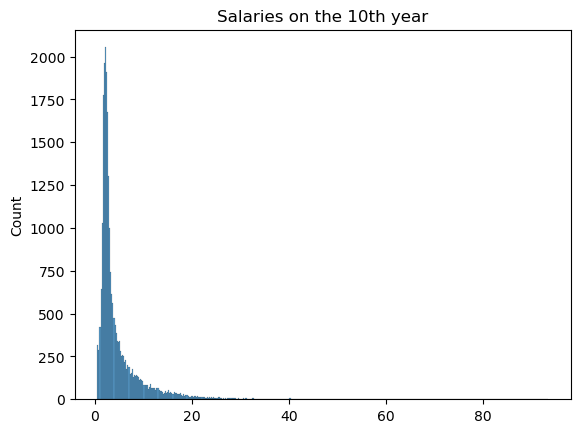

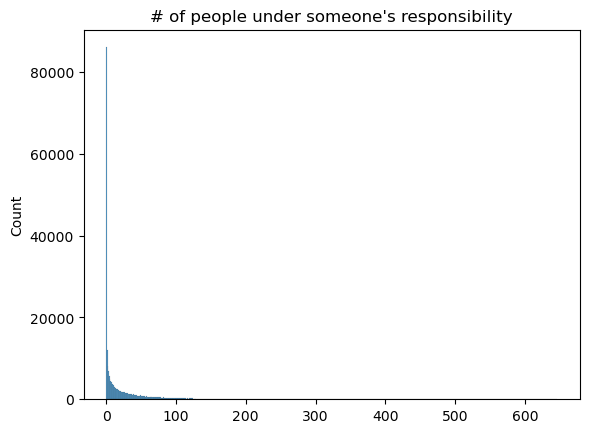

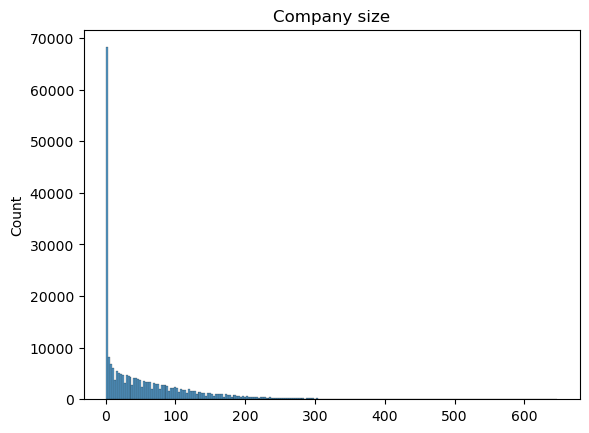

In [ ]:
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten())
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) 
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) 
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from keras import Sequential, Input
from keras.layers import Dense, SimpleRNN, Flatten, Normalization

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)

model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(normalizer)
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

In [ ]:
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mae'])
    return model

model = compile_model(model)

In [ ]:
%%time

from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=100,
                    callbacks=[es],
                    verbose=1)

In [ ]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [ ]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {model_mae[1]:.4f}')